In [1]:
import numpy as np
from yahist import Hist1D
import matplotlib.pyplot as plt

## 1D histograms

A histogram object is a collection of bin counts, edges, (potentially asymmetric) errors, and maybe some metadata

In [2]:
Hist1D().__dict__

{'_counts': array([0.]),
 '_edges': array([0., 1.]),
 '_errors': array([0.]),
 '_errors_up': None,
 '_errors_down': None,
 '_metadata': {}}

Constructing a `Hist1D` object uses the full `np.histogram` constructor under the hood. The `metadata` kwarg is attached to the histogram as metadata.

Make two histograms (`num`erator and `den`ominator) which are filled with some random numbers.

In [3]:
bins = np.linspace(-3,3,31)
v = np.random.normal(0,1,2000)
num = Hist1D(v[:len(v)//2],bins=bins,label="num", metadata=dict(myattr=2))
den = Hist1D(v[:len(v)//1],bins=bins,label="den")

In [4]:
num.metadata

{'label': 'num', 'myattr': 2}

In the terminal, the `__repr__` prints out bin counts and errors.

In [5]:
print((num/den).rebin(3))

[ 2.00 ± 1.14    1.41 ± 0.35    1.38 ± 0.19    1.47 ± 0.14    1.56 ± 0.13
  1.51 ± 0.12    1.48 ± 0.14    1.47 ± 0.22    1.68 ± 0.53    1.03 ± 0.69]


In a notebook, this is prettily formatted into an HTML table.
An svg plot without labels/formatting is drawn for cursory checks. The svg creation and rendering is nearly instant (less than a few ms), as opposed to a proper plot which renders and rasterizes many objects.

In [6]:
num

[ 2.00 ± 1.41    2.00 ± 1.41    3.00 ± 1.73    7.00 ± 2.65    6.00 ± 2.45
 13.00 ± 3.61   16.00 ± 4.00   24.00 ± 4.90   42.00 ± 6.48   44.00 ± 6.63
 51.00 ± 7.14   64.00 ± 8.00   70.00 ± 8.37   74.00 ± 8.60   78.00 ± 8.83
 85.00 ± 9.22   86.00 ± 9.27   69.00 ± 8.31   71.00 ± 8.43   52.00 ± 7.21
 40.00 ± 6.32   33.00 ± 5.74   24.00 ± 4.90   16.00 ± 4.00   12.00 ± 3.46
  8.00 ± 2.83    3.00 ± 1.73    3.00 ± 1.73    1.00 ± 1.00    1.00 ± 1.00]

Or, just explicitly plot it with matplotlib.

<AxesSubplot:>

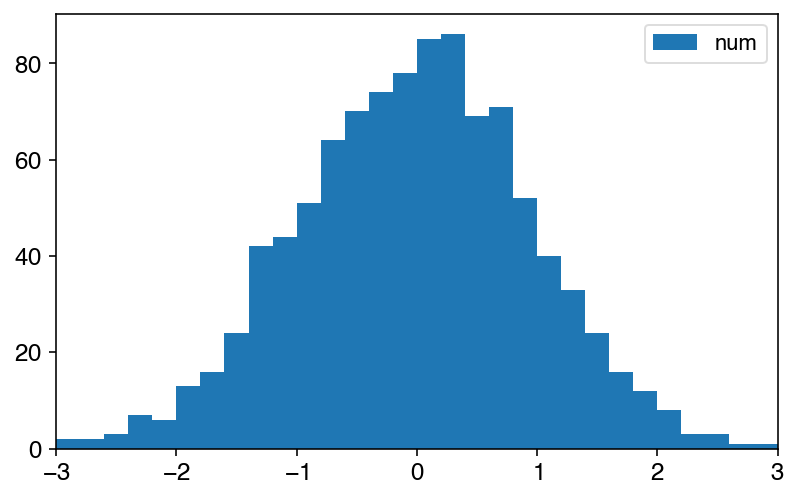

In [7]:
num.plot()

Change the style and show bin counts with some more options.

<AxesSubplot:>

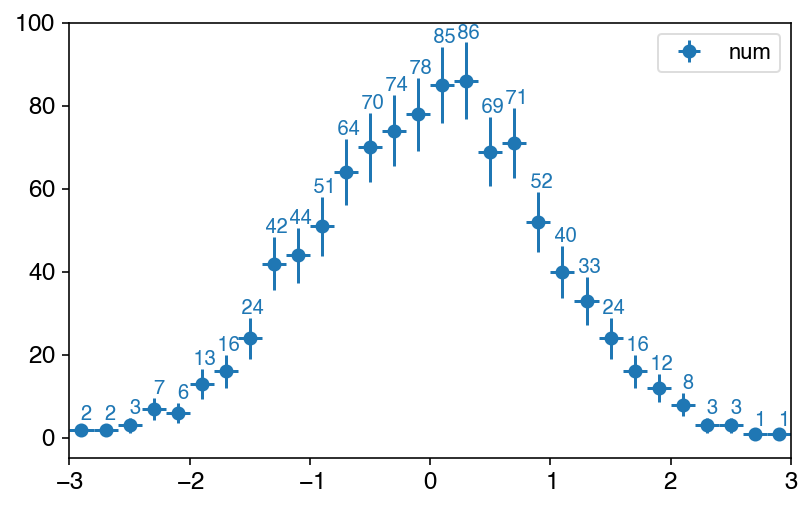

In [8]:
num.plot(show_errors=True,show_counts=True)

If you like pretty things...

<AxesSubplot:>

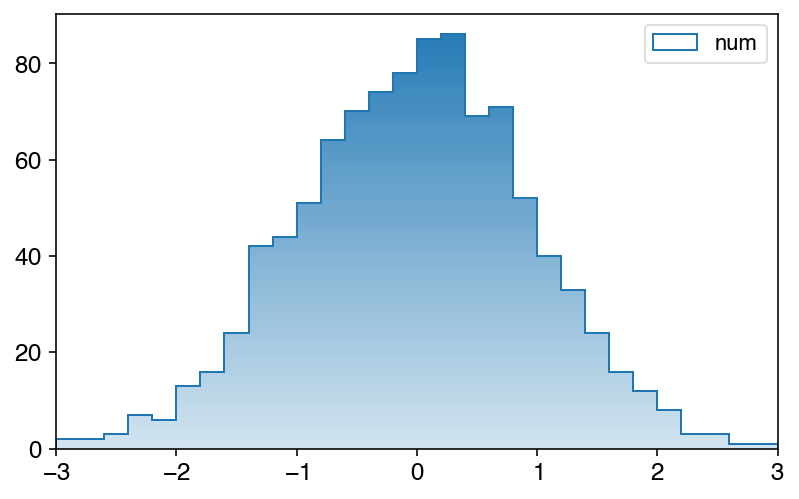

In [9]:
num.plot(gradient=True)

Do math with the histograms and merge 3 bins into one

In [10]:
2*(num/den).rebin(3)

[ 4.00 ± 2.28    2.82 ± 0.70    2.75 ± 0.38    2.94 ± 0.29    3.12 ± 0.26
  3.02 ± 0.24    2.96 ± 0.29    2.94 ± 0.43    3.36 ± 1.07    2.07 ± 1.37]

Make a more complicated plot with a ratio panel.

<AxesSubplot:>

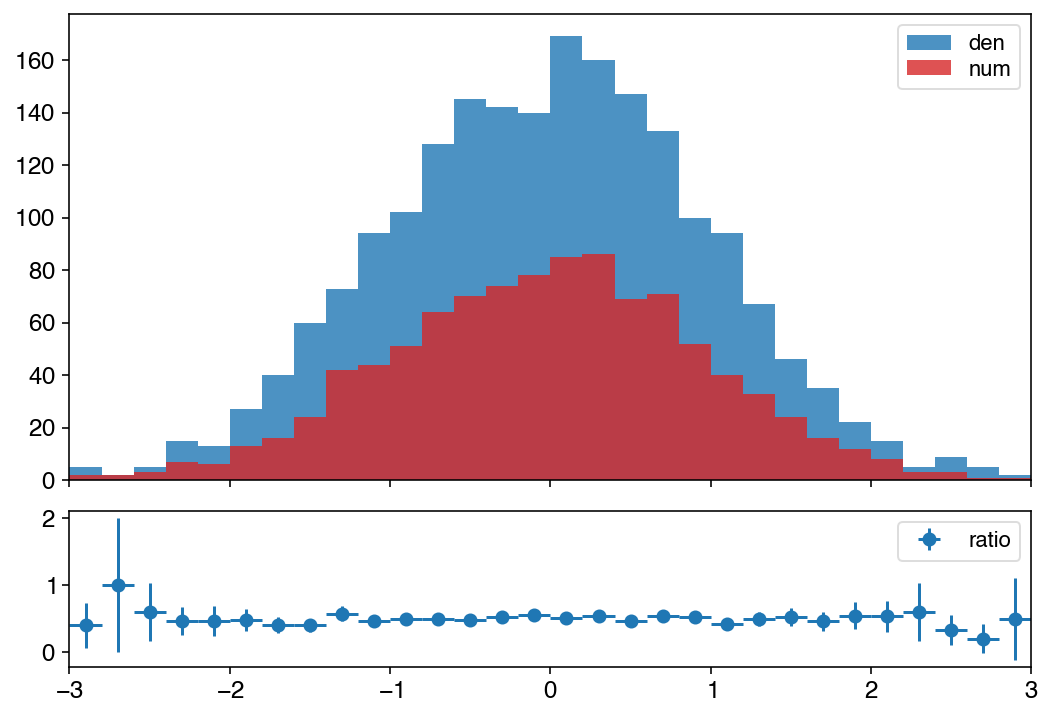

In [11]:
fig,(ax1,ax2) = plt.subplots(2,sharex=True,figsize=(8,6),gridspec_kw=dict(height_ratios=[3, 1]))
den.plot(ax=ax1,alpha=0.8,color="C0")
num.plot(ax=ax1,alpha=0.8,color="C3")
(num/den).plot(ax=ax2,show_errors=True,label="ratio")

Generate histograms from `scipy.stats` random distributions quickly

In [12]:
Hist1D.from_random("expon")

[4616.00 ± 67.94   4408.00 ± 66.39   4187.00 ± 64.71   3907.00 ± 62.51
 3842.00 ± 61.98   3585.00 ± 59.87   3451.00 ± 58.75   3287.00 ± 57.33
 3187.00 ± 56.45   2940.00 ± 54.22   2911.00 ± 53.95   2852.00 ± 53.40
 2648.00 ± 51.46   2452.00 ± 49.52   2382.00 ± 48.81   2346.00 ± 48.44
 2140.00 ± 46.26   2073.00 ± 45.53   1946.00 ± 44.11   1841.00 ± 42.91
 1815.00 ± 42.60   1737.00 ± 41.68   1549.00 ± 39.36   1580.00 ± 39.75
 1580.00 ± 39.75   1384.00 ± 37.20   1410.00 ± 37.55   1263.00 ± 35.54
 1208.00 ± 34.76   1143.00 ± 33.81   1068.00 ± 32.68   1091.00 ± 33.03
 1066.00 ± 32.65   991.00 ± 31.48   946.00 ± 30.76   854.00 ± 29.22
 847.00 ± 29.10   797.00 ± 28.23   775.00 ± 27.84   703.00 ± 26.51
 694.00 ± 26.34   676.00 ± 26.00   657.00 ± 25.63   611.00 ± 24.72
 596.00 ± 24.41   563.00 ± 23.73   528.00 ± 22.98   506.00 ± 22.49
 491.00 ± 22.16   453.00 ± 21.28   434.00 ± 20.83   426.00 ± 20.64
 389.00 ± 19.72   384.00 ± 19.60   333.00 ± 18.25   334.00 ± 18.28
 335.00 ± 18.30   318.00 ± 17.83   289.00 ± 17.00   279.00 ± 16.70
 260.00 ± 16.12   231.00 ± 15.20   235.00 ± 15.33   228.00 ± 15.10
 261.00 ± 16.16   205.00 ± 14.32   176.00 ± 13.27   182.00 ± 13.49
 173.00 ± 13.15   171.00 ± 13.08   150.00 ± 12.25   163.00 ± 12.77
 146.00 ± 12.08   163.00 ± 12.77   143.00 ± 11.96   129.00 ± 11.36
 134.00 ± 11.58   112.00 ± 10.58   126.00 ± 11.22   106.00 ± 10.30
 117.00 ± 10.82   93.00 ± 9.64   107.00 ± 10.34   103.00 ± 10.15
 85.00 ± 9.22   99.00 ± 9.95   78.00 ± 8.83   77.00 ± 8.77   84.00 ± 9.17
 63.00 ± 7.94   72.00 ± 8.49   81.00 ± 9.00   65.00 ± 8.06   55.00 ± 7.42
 44.00 ± 6.63   53.00 ± 7.28   48.00 ± 6.93   57.00 ± 7.55   48.00 ± 6.93
 36.00 ± 6.00   44.00 ± 6.63   47.00 ± 6.86   45.00 ± 6.71   42.00 ± 6.48
 30.00 ± 5.48   35.00 ± 5.92   35.00 ± 5.92   26.00 ± 5.10   24.00 ± 4.90
 27.00 ± 5.20   22.00 ± 4.69   29.00 ± 5.39   26.00 ± 5.10   28.00 ± 5.29
 29.00 ± 5.39   10.00 ± 3.16   16.00 ± 4.00   14.00 ± 3.74   19.00 ± 4.36
 19.00 ± 4.36   18.00 ± 4.24   18.00 ± 4.24   21.00 ± 4.58   12.00 ± 3.46
 12.00 ± 3.46   27.00 ± 5.20   11.00 ± 3.32   14.00 ± 3.74   11.00 ± 3.32
 10.00 ± 3.16   13.00 ± 3.61    7.00 ± 2.65    5.00 ± 2.24   10.00 ± 3.16
  8.00 ± 2.83   11.00 ± 3.32    6.00 ± 2.45   11.00 ± 3.32    8.00 ± 2.83
  7.00 ± 2.65    5.00 ± 2.24    5.00 ± 2.24    4.00 ± 2.00    2.00 ± 1.41
  6.00 ± 2.45    4.00 ± 2.00    4.00 ± 2.00    1.00 ± 1.00    5.00 ± 2.24
  2.00 ± 1.41    4.00 ± 2.00    3.00 ± 1.73    2.00 ± 1.41    7.00 ± 2.65
  3.00 ± 1.73    1.00 ± 1.00    3.00 ± 1.73    0.00 ± 0.00    2.00 ± 1.41
  4.00 ± 2.00    4.00 ± 2.00    4.00 ± 2.00    3.00 ± 1.73    3.00 ± 1.73
  1.00 ± 1.00    1.00 ± 1.00    4.00 ± 2.00    3.00 ± 1.73    5.00 ± 2.24
  4.00 ± 2.00    2.00 ± 1.41    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  2.00 ± 1.41    0.00 ± 0.00    1.00 ± 1.00    2.00 ± 1.41    2.00 ± 1.41
  1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00    0.00 ± 0.00    1.00 ± 1.00
  1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    2.00 ± 1.41
  1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00
  1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00    2.00 ± 1.41    0.00 ± 0.00
  1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00
  1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   

In [13]:
Hist1D.from_random("norm", bins="100,-3,3", size=1e3)

[ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00    0.00 ± 0.00
  0.00 ± 0.00    0.00 ± 0.00    2.00 ± 1.41    2.00 ± 1.41    1.00 ± 1.00
  1.00 ± 1.00    2.00 ± 1.41    2.00 ± 1.41    1.00 ± 1.00    3.00 ± 1.73
  6.00 ± 2.45    3.00 ± 1.73    4.00 ± 2.00    3.00 ± 1.73    5.00 ± 2.24
  6.00 ± 2.45    6.00 ± 2.45    7.00 ± 2.65    6.00 ± 2.45    9.00 ± 3.00
  6.00 ± 2.45   10.00 ± 3.16    9.00 ± 3.00    8.00 ± 2.83   16.00 ± 4.00
 12.00 ± 3.46   14.00 ± 3.74   11.00 ± 3.32   16.00 ± 4.00   20.00 ± 4.47
 15.00 ± 3.87   19.00 ± 4.36   19.00 ± 4.36   17.00 ± 4.12   17.00 ± 4.12
 24.00 ± 4.90   26.00 ± 5.10   21.00 ± 4.58   22.00 ± 4.69   18.00 ± 4.24
 31.00 ± 5.57   24.00 ± 4.90   25.00 ± 5.00   23.00 ± 4.80   23.00 ± 4.80
 20.00 ± 4.47   24.00 ± 4.90   30.00 ± 5.48   20.00 ± 4.47   22.00 ± 4.69
 23.00 ± 4.80   20.00 ± 4.47   11.00 ± 3.32   22.00 ± 4.69   17.00 ± 4.12
 16.00 ± 4.00   25.00 ± 5.00   18.00 ± 4.24   12.00 ± 3.46   16.00 ± 4.00
 21.00 ± 4.58   19.00 ± 4.36   11.00 ± 3.32   17.00 ± 4.12   14.00 ± 3.74
 13.00 ± 3.61   11.00 ± 3.32    5.00 ± 2.24    9.00 ± 3.00    6.00 ± 2.45
  5.00 ± 2.24   11.00 ± 3.32    6.00 ± 2.45    3.00 ± 1.73    2.00 ± 1.41
  4.00 ± 2.00    5.00 ± 2.24    3.00 ± 1.73    3.00 ± 1.73    2.00 ± 1.41
  1.00 ± 1.00    1.00 ± 1.00    1.00 ± 1.00    2.00 ± 1.41    1.00 ± 1.00
  3.00 ± 1.73    1.00 ± 1.00    1.00 ± 1.00    0.00 ± 0.00    1.00 ± 1.00
  1.00 ± 1.00    1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00    3.00 ± 1.73]

Histogram objects are pickle-able, and can be de/serialized from/to json.

In [14]:
num.to_json()

# or num.to_json("test.json")
#    num = Hist1D.from_json("test.json")

'{"_counts": [2.0, 2.0, 3.0, 7.0, 6.0, 13.0, 16.0, 24.0, 42.0, 44.0, 51.0, 64.0, 70.0, 74.0, 78.0, 85.0, 86.0, 69.0, 71.0, 52.0, 40.0, 33.0, 24.0, 16.0, 12.0, 8.0, 3.0, 3.0, 1.0, 1.0], "_edges": [-3.0, -2.8, -2.6, -2.4, -2.2, -2.0, -1.7999999999999998, -1.5999999999999999, -1.4, -1.2, -1.0, -0.7999999999999998, -0.5999999999999996, -0.3999999999999999, -0.19999999999999973, 0.0, 0.20000000000000018, 0.40000000000000036, 0.6000000000000001, 0.8000000000000003, 1.0, 1.2000000000000002, 1.4000000000000004, 1.6000000000000005, 1.8000000000000007, 2.0, 2.2, 2.4000000000000004, 2.6000000000000005, 2.8000000000000007, 3.0], "_errors": [1.4142135623730951, 1.4142135623730951, 1.7320508075688772, 2.6457513110645907, 2.449489742783178, 3.605551275463989, 4.0, 4.898979485566356, 6.48074069840786, 6.6332495807108, 7.14142842854285, 8.0, 8.366600265340756, 8.602325267042627, 8.831760866327848, 9.219544457292887, 9.273618495495704, 8.306623862918075, 8.426149773176359, 7.211102550927978, 6.324555320

In [15]:
Hist1D.from_json(num.to_json())

[ 2.00 ± 1.41    2.00 ± 1.41    3.00 ± 1.73    7.00 ± 2.65    6.00 ± 2.45
 13.00 ± 3.61   16.00 ± 4.00   24.00 ± 4.90   42.00 ± 6.48   44.00 ± 6.63
 51.00 ± 7.14   64.00 ± 8.00   70.00 ± 8.37   74.00 ± 8.60   78.00 ± 8.83
 85.00 ± 9.22   86.00 ± 9.27   69.00 ± 8.31   71.00 ± 8.43   52.00 ± 7.21
 40.00 ± 6.32   33.00 ± 5.74   24.00 ± 4.90   16.00 ± 4.00   12.00 ± 3.46
  8.00 ± 2.83    3.00 ± 1.73    3.00 ± 1.73    1.00 ± 1.00    1.00 ± 1.00]

## 2D histograms

2D histograms are basically wrapped around `np.histogram2d()`. The string representation has a matrix of counts and errors.

In [16]:
from yahist import Hist2D

N = 50000
v = lambda:np.random.normal(0,1,N)
lsp = np.linspace
h = Hist2D(np.c_[v(), v()], bins=[lsp(-3,3,51), lsp(-3,3,51)])

print(str(h))

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    1.00 ± 1.00]]


Similar to the 1D object, the HTML representation for 2D histograms is a rendered plot.

In [17]:
h

[[ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    1.00 ± 1.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 ...
 [ 0.00 ± 0.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 0.00 ± 0.00    0.00 ± 0.00    1.00 ± 1.00   ...    0.00 ± 0.00
   0.00 ± 0.00    0.00 ± 0.00]
 [ 1.00 ± 1.00    0.00 ± 0.00    0.00 ± 0.00   ...    0.00 ± 0.00
   0.00 ± 0.00    1.00 ± 1.00]]

Or just plot it explicitly with matplotlib. kwargs are passed to `pcolorfast`, except for a few which are available for convenience: `logz`, ...

(<matplotlib.image.AxesImage at 0x11fb9f438>, <AxesSubplot:>)

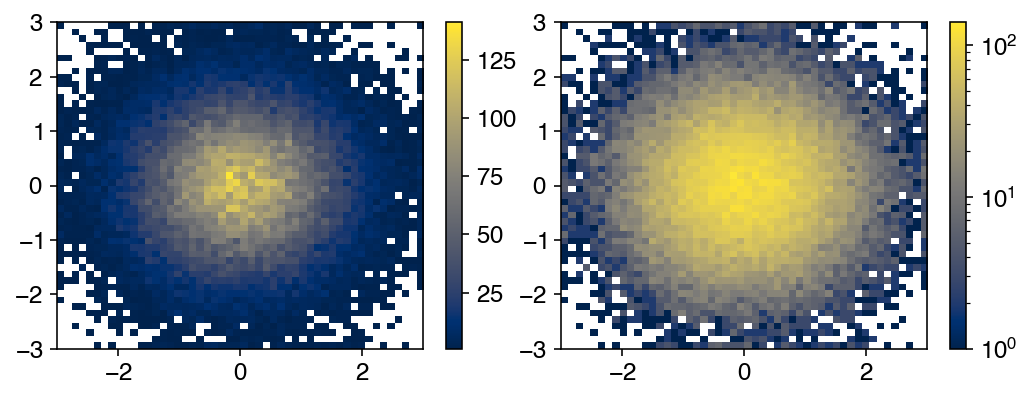

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3))
h.plot(ax=ax1, cmap="cividis")
h.plot(ax=ax2, cmap="cividis", logz=True)

Chain a few methods together. `projection("x")` projects the bin contents onto the x-axis by summing, returning a `Hist1D`.

<AxesSubplot:>

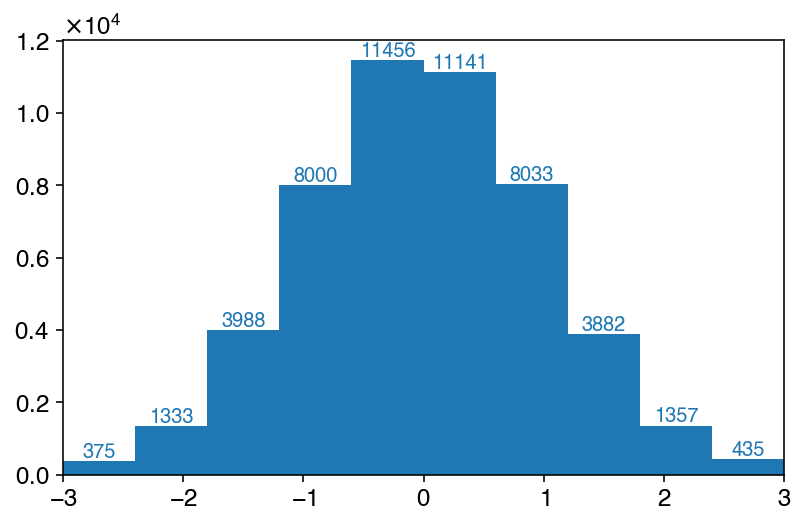

In [19]:
(h
 .rebin(5)
 .projection("x")
 .plot(show_counts=True)
)

`profile("x")` profiles/integrates out the y dimension. That is, for each constant-x slice, the profiled value is the mean y value. In the case for this symmetric gaussian, they are close to 0.

<AxesSubplot:>

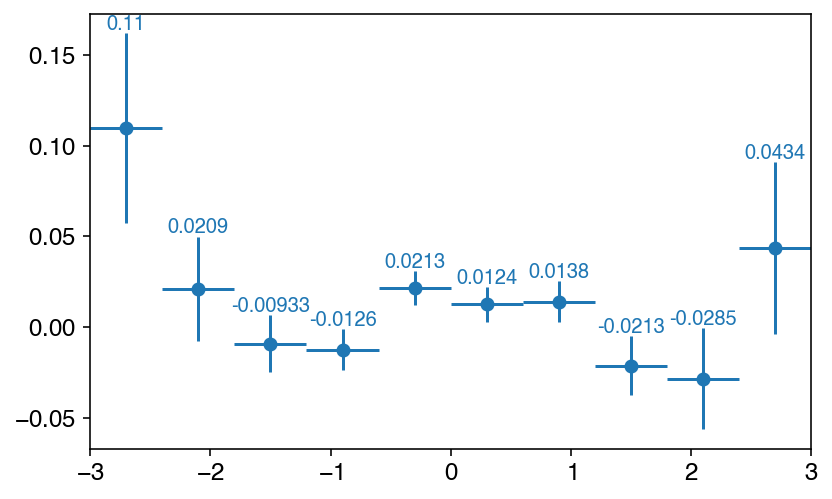

In [20]:
(h
 .rebin(5)
 .profile("x")
 .plot(show_counts=True,show_errors=True, counts_fmt_func="{:.3g}".format)
)

Hist2D is aware of pandas DataFrame column names.

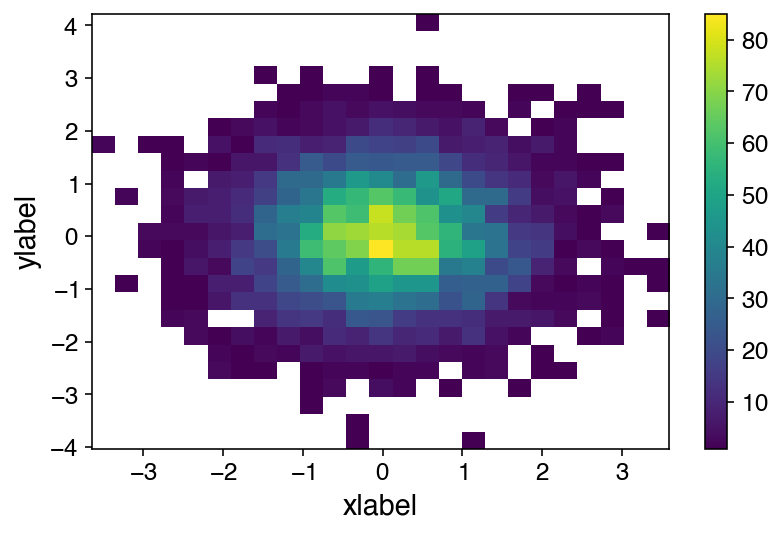

In [21]:
try:
    import pandas as pd
    df = pd.DataFrame(np.random.normal(size=(5000, 3)), columns=["xlabel", "ylabel", "zlabel"])
    Hist2D(df[["xlabel","ylabel"]], bins=25).plot()
except:
    pass

When non-uniform bins are specified, it can be hard to see some bin contents. In this case, the `equidistant=True` parameter can be used to make the bin sizes equal.

/Users/namin/Library/Python/3.7/lib/python/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(<matplotlib.image.AxesImage at 0x11ffbd128>, <AxesSubplot:>)

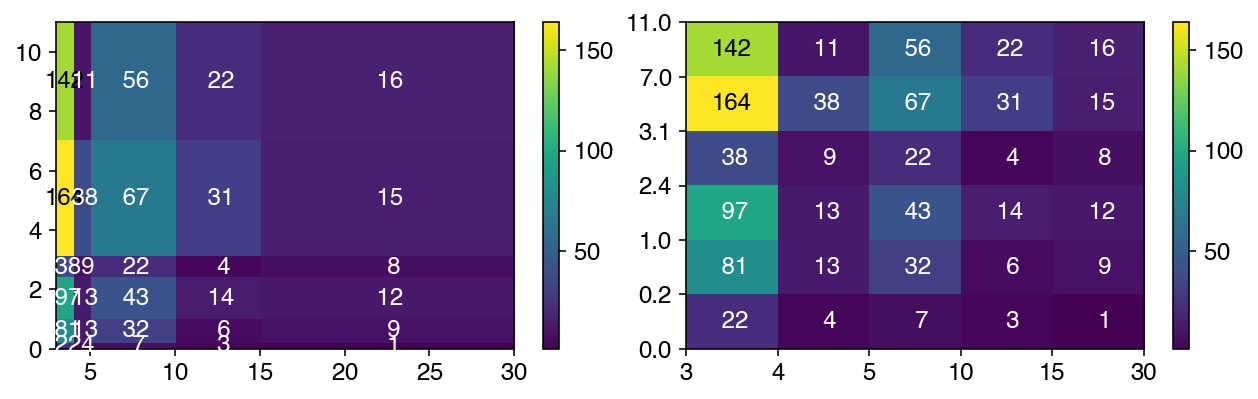

In [22]:
bins = [
    np.array([3,4,5,10,15,30]),
    np.array([0,0.2,1.0,2.4,3.1,7.0,11.]),
]
h = Hist2D.from_random("expon", params=[0, 5], bins=bins, size=1e3, random_state=42)

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,3))
h.plot(ax=ax1, show_counts=True)
h.plot(ax=ax2, show_counts=True, equidistant=True)

## Stacking histograms

The `bottom` kwarg of `plt.hist()` allows one to easily stack histograms, so the wrapper code in `utils.plot_stack` is pretty simple.

In [23]:
from yahist.utils import plot_stack
import inspect
print(inspect.getsource(plot_stack))

def plot_stack(hists, **kwargs):
    """
    Plots a list of `Hist1D` objects as a stack

    Parameters
    ----------
    hists : list of `Hist1D` objects
    kwargs : passed to `Hist1D.plot()`
    """
    bottom = 0.0
    for h in hists:
        h.plot(bottom=bottom, **kwargs)
        bottom += h.counts



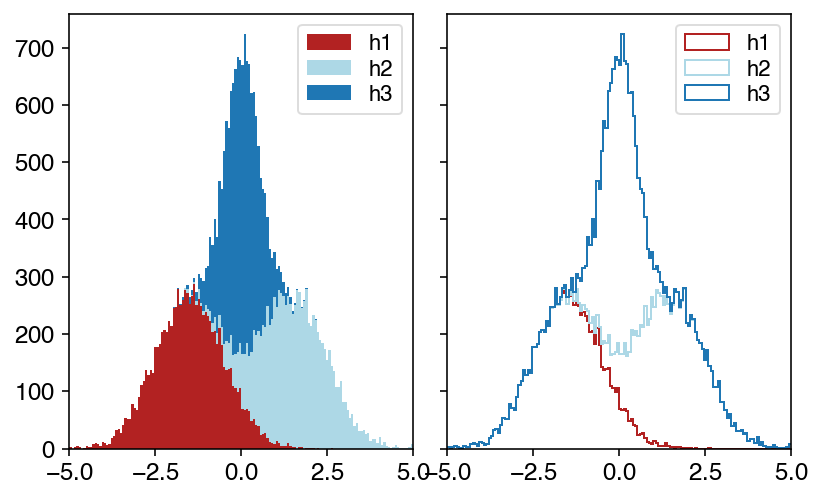

In [24]:
h1 = Hist1D(np.random.normal(-1.5,1,10000), bins="150,-5,5", color="firebrick", label="h1")
h2 = Hist1D(np.random.normal(1.5,1,10000), bins="150,-5,5", color="lightblue", label="h2")
h3 = Hist1D(np.random.normal(0.0,0.5,10000), bins="150,-5,5", label="h3")
fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
plot_stack([h1,h2,h3],ax=ax1)
plot_stack([h1,h2,h3],histtype="step",ax=ax2)

## Simple fits

While this is not a fitting package, there is a function for conveniently fitting a user-provided 
function to a histogram, taking into account the histogram errors. The function is a wrapper around `scipy.optimize.curve_fit`.

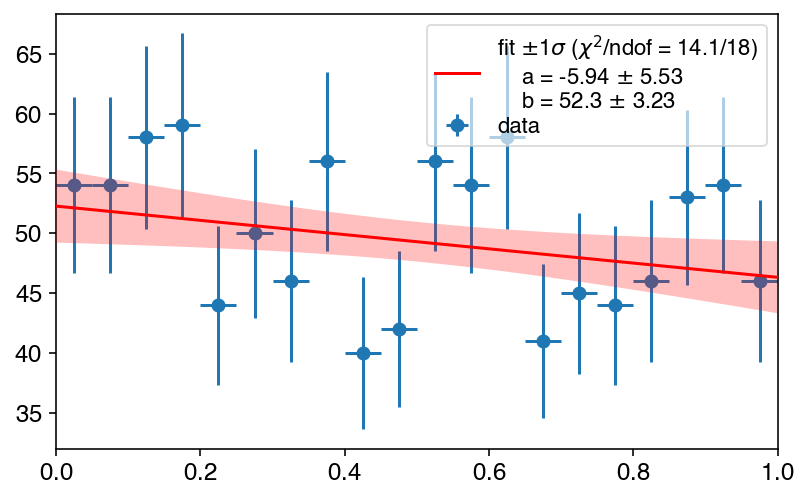

In [25]:
np.random.seed(42)
h = Hist1D(np.random.random(1000), bins="20,0,1")
h.plot(show_errors=True, label="data")
# parses an expression string, assuming the main parameter is `x`
res = h.fit("a*x+b")
# OR h.fit(lambda x,a,b: a*x+b)

Note that `curve_fit` minimizes chi2 by default. To minimize log likelihood, pass the `likelihood=True` option. In the limit of large counts, both are equivalent. Log likelihood is more correct for low counts, especially when some bins are empty.

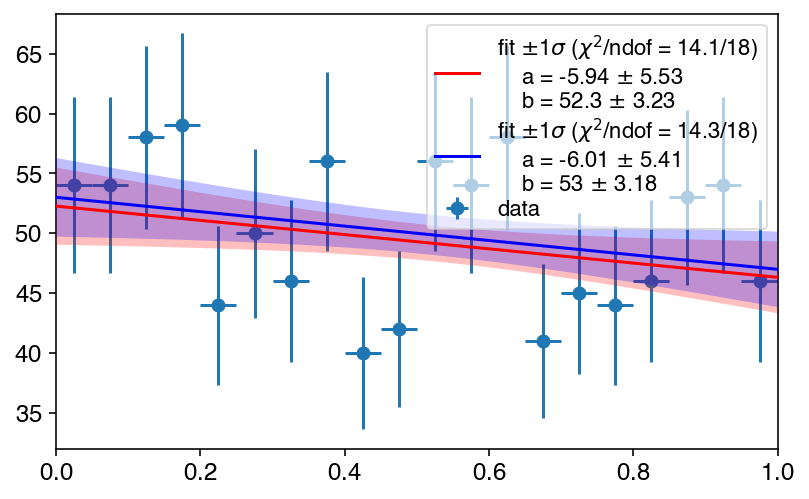

In [26]:
h.plot(show_errors=True, label="data")
res = h.fit("a*x+b", color="r")
res = h.fit("a*x+b", color="b", likelihood=True)

Or a slightly more complicated fit, with a ratio panel...

<AxesSubplot:>

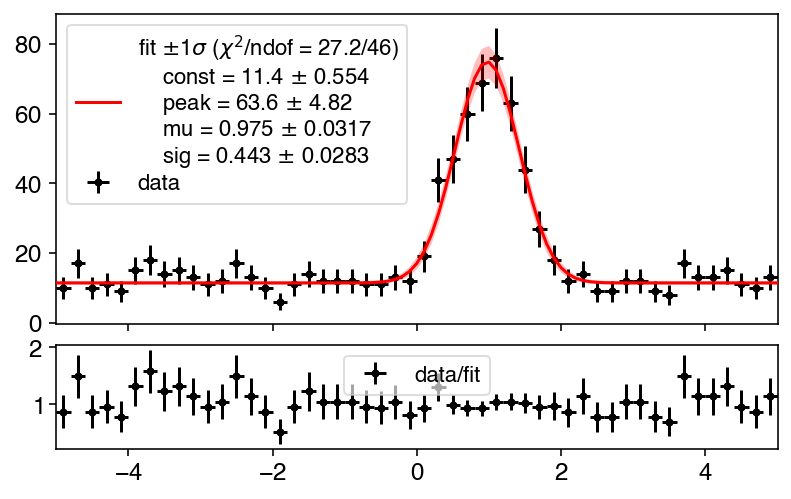

In [27]:
np.random.seed(42)

fig,(ax1,ax2) = plt.subplots(2,sharex=True,gridspec_kw=dict(height_ratios=[3, 1]))

bins = "50,-5,5"
hdata = (Hist1D(np.random.normal(1,0.5,350), bins=bins) 
         + Hist1D(10*np.random.random(600)-5, bins=bins))
hdata.plot(ax=ax1,show_errors=True, color="k",markersize=3,label="data")

result = hdata.fit("const+peak*np.exp(-(x-mu)**2/(2*sig**2))", ax=ax1)

ratio = (hdata/result["hfit"])
ratio.plot(ax=ax2, color="k", label="data/fit", show_errors=True,markersize=3)

The returned `result` object has an HTML representation for notebooks showing the fit parameters. The object itself is a `dict` containing information about the parameters and including a `Hist1D` object of the fit. 

In [28]:
result

parameter,value
const,11.4 ± 0.554
peak,63.57 ± 4.824
mu,0.9748 ± 0.03169
sig,0.4427 ± 0.02828


In [29]:
dict(result)

{'parnames': ('const', 'peak', 'mu', 'sig'),
 'parvalues': array([11.40179986, 63.57346636,  0.97481757,  0.44270051]),
 'parerrors': array([0.55399751, 4.82432105, 0.03169182, 0.02827723]),
 'chi2': 27.177204062645963,
 'ndof': 46,
 'hfit': [11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.41 ± 0.56   11.45 ± 0.55   11.65 ± 0.56   12.41 ± 0.71   14.74 ± 1.28
  20.42 ± 2.21   31.30 ± 3.07   47.17 ± 3.51   63.83 ± 3.98   74.07 ± 4.61
  72.48 ± 4.50   59.94 ± 3.82   42.86 ± 3.39   28.02 ± 2.82   18.56 ± 1.89
  13.92 ± 1.05   12.12 ± 0.63   11.57 ± 0.55   11.43 ± 0.56   11.41 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56
  11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56   11.40 ± 0.56]}

<AxesSubplot:>

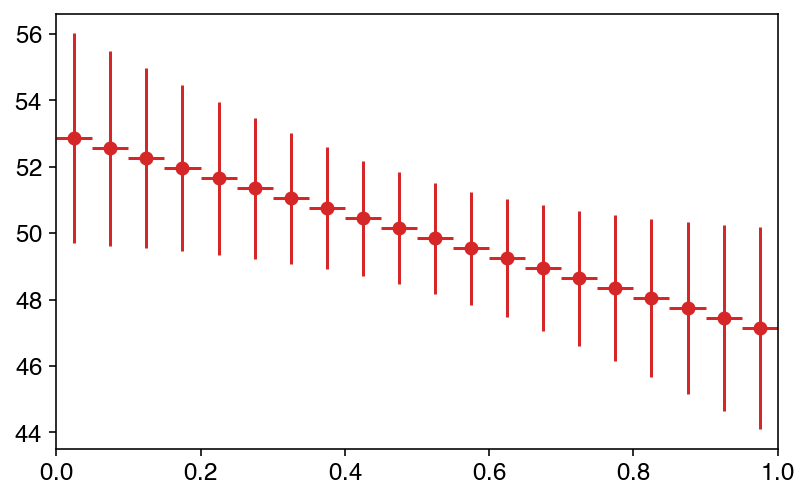

In [30]:
res["hfit"].plot(show_errors=True,color="C3")

## Fluent interface

This is kind of a pointless example, but it shows the fluent interface. `plot` and `fit` are usually methods used terminally,
but one can use the `return_self` keyword argument to plot and return the `Hist` object instead of the matplotlib ones to allow further chaining.

/Users/namin/sandbox/dev/yahist/yahist/hist2d.py:176: RuntimeWarning: invalid value encountered in true_divide
  r_val = num / den
/Users/namin/sandbox/dev/yahist/yahist/hist2d.py:177: RuntimeWarning: invalid value encountered in true_divide
  r_err = ((num_err / den) ** 2 + (den_err * num / den ** 2.0) ** 2.0) ** 0.5


parameter,value
a,0.00539 ± 0.003165
b,0.002716 ± 0.003016


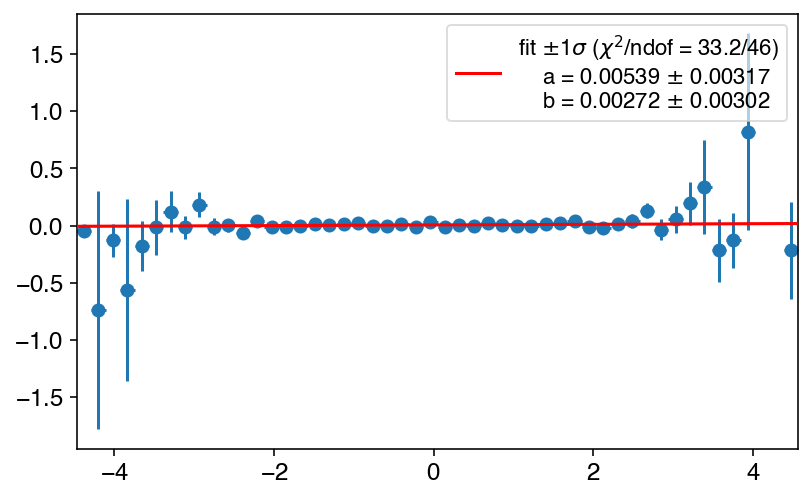

In [31]:
(Hist2D
 .from_random("norm", bins=100) # 2d gaussian centered at (0,0)
 .rebin(2) # combine pairs of bins into one
 .transpose() # flip x/y
 .normalize() # scale counts so that integral = 1
 .profile("x") # profile out y axis, giving a Hist1D
 .plot(show_errors=True, return_self=True) # plot and return self object
 .fit("a+b*x") # fit line and return fit object
)